# Compare Two NR Simulations from Different Groups: SXS, GaTech, q=2 Nonspinning

In [32]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
from matplotlib.pyplot import *

# Import useful things
from nrutils import scsearch,gwylm
from numpy import array

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <center>Find Simulations and Load data

In [19]:
# Search for a simulation. Hopefully the results will be from different codes. NOTE that this could be done more manually so that we don't "hope" but know.
A = scsearch( q=[1,4], nonspinning=True, verbose=True )

[scsearch]>> Found nonspinning (=True) keyword.
[scsearch]>> Found q (=[1, 4]) keyword.
[scsearch]>> Found verbose (=True) keyword.
## Found 136 possibly degenerate simulations:
[0001][uib] q4Sebastian: ns-q4.00
[0002][athena] HRq-series: ns-q1.60
[0003][athena] HRq-series: ns-q1.40
[0004][athena] HRq-series: ns-q1.20
[0005][athena] HRq-series: ns-q1.10
[0006][athena] HRq-series: ns-q1.30
[0007][athena] HRq-series: ns-q1.50
[0008][athena] HRq-series: ns-q1.00
[0009][athena] HRq-series: ns-q3.00
[0010][athena] HRq-series: ns-q2.90
[0011][athena] HRq-series: ns-q2.80
[0012][athena] HRq-series: ns-q3.50
[0013][athena] HRq-series: ns-q2.60
[0014][athena] HRq-series: ns-q2.70
[0015][athena] HRq-series: ns-q3.40
[0016][athena] HRq-series: ns-q3.30
[0017][athena] HRq-series: ns-q3.20
[0018][athena] HRq-series: ns-q3.60
[0019][athena] HRq-series: ns-q3.10
[0020][athena] HRq-series: ns-q3.80
[0021][athena] HRq-series: ns-q3.70
[0022][athena] HRq-series: ns-q3.90
[0023][athena] HRq-series: ns-q2

In [20]:
# Select which of the search results we wish to keep
U,V = A[77],A[131]

In [38]:
# Load the modes 
u = gwylm(U,lmax=2,verbose=True)
v = gwylm(V,lmax=2,verbose=True)

(gwylm)>> Found clean (=False) keyword.
(gwylm)>> Found lmax (=2) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x108609170>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(load)>> Loading: rMPsi4_Y_l2_m-2.asc
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.290315 will more than suffice.
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.290315 will more than suffice.
(load)>> Re-orienting waveform phase to be consistent with internal sign convention for Psi4, where sign(dPhi/dt)=1*sign(m). Note that the internal sign convention is defined in ... nrutils/core/__init__.py as "M_RELATIVE_SIGN_CONVENTION". This message has appeared becuase the waveform is determioned to obey and sign convention: sign(dPhi/dt)=-1*sign(m).
(load)>> Loading: rMPsi4_Y_l2_m-1.asc
(**) Warning: No dt

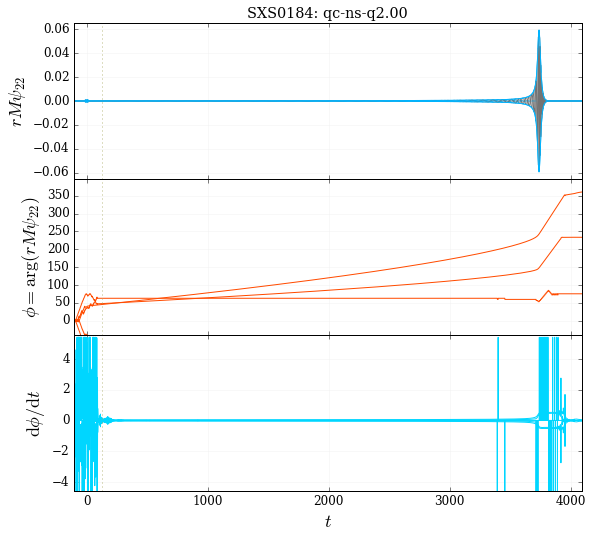

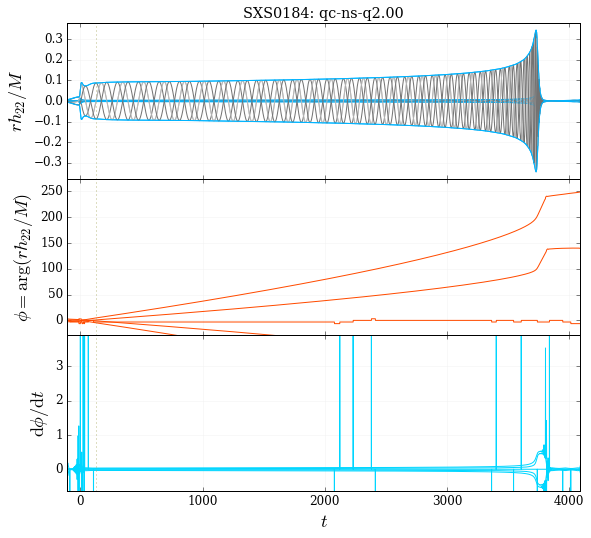

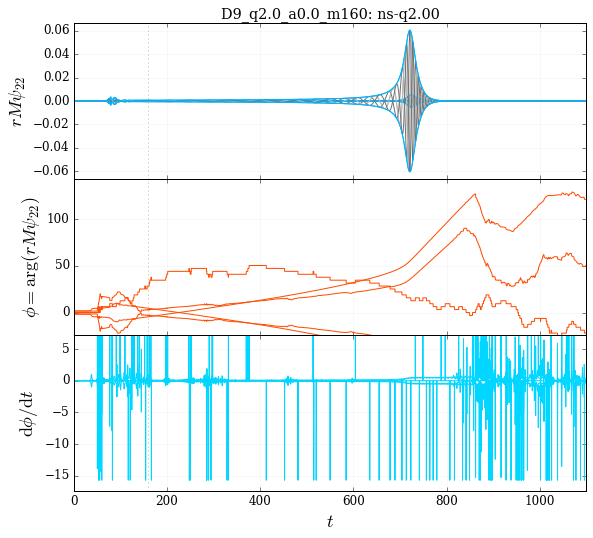

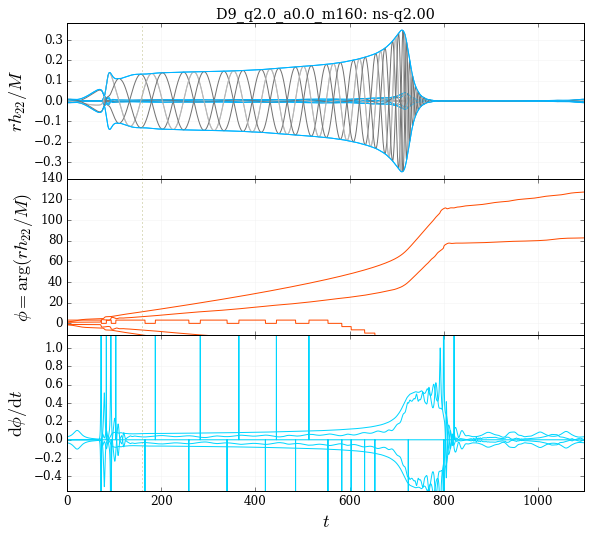

In [39]:
# Plot the waveforms 
u.plot(); v.plot()

## <center>Recompose the Waveforms

In [40]:
#
theta,phi = 0,0
a,b = u.recompose(theta,phi,kind='strain'),v.recompose(theta,phi,kind='strain')

## <center>Plot the amplitudes to verify correct scaling between GT and SXS waveforms

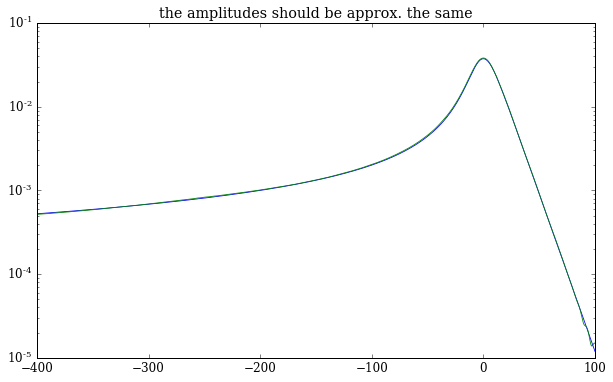

In [41]:
figure( figsize=2*array([5,3]) ) 
plot( a.t - a.intrp_t_amp_max, a.amp )
plot( b.t - b.intrp_t_amp_max, b.amp )
gca().set_yscale("log", nonposy='clip')
ylim([1e-5,1e-1])
xlim([-400,100])
title('the amplitudes should be approx. the same')

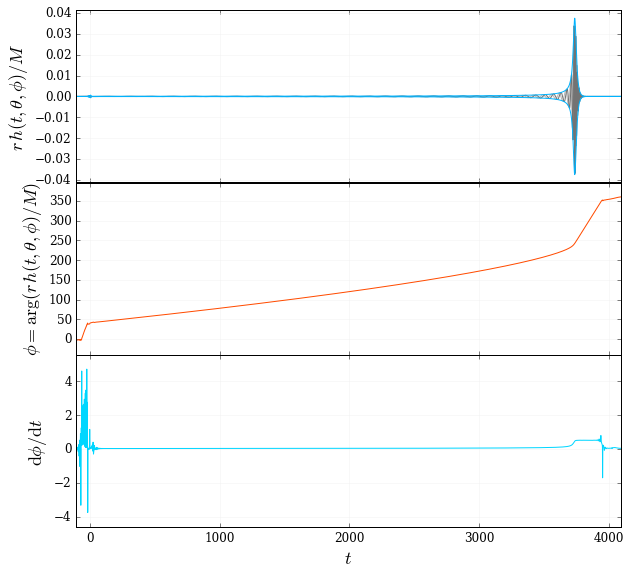

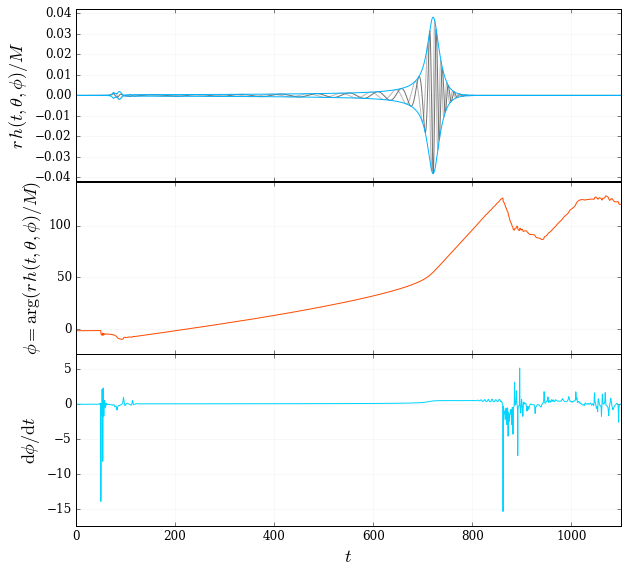

In [42]:
a.plot();b.plot();